### Extração de Features de Imagens Usando OpenCV
### Análise de Imagens com Detecção de Faces e Marcos Faciais

Neste notebook, iremos carregar uma imagem de uma pasta local, realizar a detecção de faces e marcar pontos de referência faciais utilizando OpenCV.
Vale dizer que ele também utiliza-se do virtual environment.

### 1 Importações de Bibliotecas
Importando bibliotecas necessárias, utilizado as bibliotecas OpenCV (para processamento de imagens), NumPy (para manipulação de arrays), urllib (para baixar imagens a partir de URLs), e Matplotlib (para exibir imagens).


In [17]:
# Importando as bibliotecas necessárias
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import urllib.request as urlreq # used for accessing url to download files

# Verificando a versão do OpenCV
print(cv2.__version__)


4.10.0


### 1 Carregando a Imagem

Vamos carregar uma imagem da pasta `data/raw/no_autistic/`, onde a imagem tem o nome `0002.jpg`.


In [3]:
# Definindo o caminho da imagem
image_path = '../data/raw/no_autistic/0002.jpg'

# Verificando se a imagem existe
if os.path.exists(image_path):
    print("Imagem carregada com sucesso.")
else:
    print("Imagem não encontrada.")


Imagem carregada com sucesso.


In [4]:
# Lendo a imagem com OpenCV
image = cv2.imread(image_path)

# Convertendo a imagem para o formato RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### 2 Manipulando a imagem

Vamos obter as dimensões da imagem e preparar uma cópia para posterior uso.


In [5]:
# Obtendo dimensões da imagem
height, width, _ = image_rgb.shape

# Criando uma cópia da imagem para uso posterior
image_template = image_rgb.copy()


##### 2.1 Convertendo a Imagem para Escala de Cinza

A próxima etapa é converter a imagem para escala de cinza, o que facilitará a detecção de faces.


In [6]:
# Convertendo a imagem para escala de cinza
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

### 3 Detecção de Faces

Usaremos um classificador em cascata para detectar faces na imagem em escala de cinza.


In [7]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")


File exists


In [8]:
# Carregando o classificador em cascata para detecção de faces
haarcascade = "haarcascade_frontalface_alt2.xml"

# Verificando se o arquivo do classificador existe
if os.path.exists(haarcascade):
    print("Classificador de faces carregado com sucesso.")
else:
    print("Classificador de faces não encontrado.")
    
# Criando uma instância do classificador
detector = cv2.CascadeClassifier(haarcascade)

# Detectando faces
faces = detector.detectMultiScale(image_gray)

# Imprimindo as coordenadas das faces detectadas
print("Faces detectadas:\n", faces)

Classificador de faces carregado com sucesso.
Faces detectadas:
 [[ 16  35 181 181]]


### 4 Detecção de Marcos Faciais

Usaremos um modelo para detectar marcos faciais na imagem.


In [10]:
# URL do modelo de detecção de marcos faciais
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"
LBFmodel = "LFBmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")


File exists


In [11]:
# Carregando o modelo para detecção de marcos faciais
LBFmodel = "LFBmodel.yaml"

# Verificando se o modelo existe
if os.path.exists(LBFmodel):
    print("Modelo de marcos faciais carregado com sucesso.")
else:
    print("Modelo de marcos faciais não encontrado.")

Modelo de marcos faciais carregado com sucesso.


In [12]:
# Criando uma instância do detector de marcos faciais
landmark_detector = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detectando marcos faciais
_, landmarks = landmark_detector.fit(image_gray, faces)

# Imprimindo as coordenadas dos marcos detectados
print("Marcos faciais detectados:\n", landmarks)

Marcos faciais detectados:
 (array([[[  5.1582456,  91.69355  ],
        [  9.283361 , 115.16693  ],
        [ 13.3863535, 136.83353  ],
        [ 17.720093 , 158.1216   ],
        [ 27.411402 , 178.03009  ],
        [ 45.00972  , 193.60925  ],
        [ 67.46247  , 205.43285  ],
        [ 89.304344 , 217.16148  ],
        [112.32767  , 221.5183   ],
        [136.34933  , 217.56668  ],
        [160.96786  , 206.9909   ],
        [185.57544  , 195.1278   ],
        [204.90663  , 178.89314  ],
        [215.074    , 157.84894  ],
        [218.90309  , 134.06833  ],
        [221.5896   , 110.49313  ],
        [224.26802  ,  85.16073  ],
        [ 15.511505 ,  92.00125  ],
        [ 30.041897 ,  83.04278  ],
        [ 47.86354  ,  81.99157  ],
        [ 65.91421  ,  83.50034  ],
        [ 83.284225 ,  88.91806  ],
        [120.8664   ,  89.02344  ],
        [139.71324  ,  81.85276  ],
        [159.74655  ,  79.36712  ],
        [179.92867  ,  81.877945 ],
        [198.46521  ,  88.49729  ],

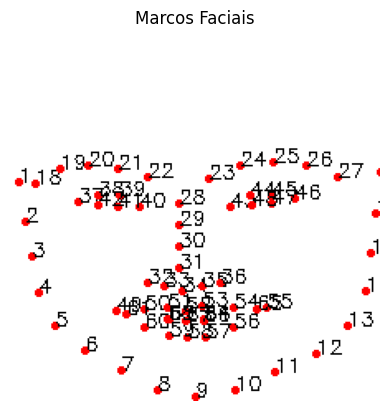

In [13]:
# Criando uma imagem em branco com as mesmas dimensões da imagem original
image_blank = np.ones((height, width, 3), dtype=np.uint8) * 255

# Plotando os marcos na nova imagem branca
for landmark in landmarks:
    for i, (x, y) in enumerate(landmark[0]):
        cv2.circle(image_blank, (int(x), int(y)), 1, (255, 0, 0), 2)
        cv2.putText(image_blank, str(i + 1), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)

# Exibindo a imagem resultante com os marcos
plt.imshow(image_blank)
plt.axis("off")
plt.title("Marcos Faciais")
plt.show()

### 7 Salvando os Marcos Faciais em um Arquivo CSV

Por fim, vamos salvar as coordenadas dos marcos faciais em um arquivo CSV.


In [18]:
# Inicializa uma lista para armazenar as linhas do DataFrame
data = []

for landmark in landmarks:
    # Aplanando o array de marcos para uma lista
    flattened_landmark = landmark.flatten()
    # Adicionando a linha à lista de dados
    data.append(flattened_landmark)

# Criando o DataFrame com colunas dinâmicas
num_points = 68  # Número de pontos (68 neste caso)
column_names = [f'X{i+1}' for i in range(num_points)] + [f'Y{i+1}' for i in range(num_points)]

# Criando o DataFrame
df = pd.DataFrame(data, columns=column_names)

# Salvando o DataFrame em um arquivo CSV
df.to_csv('landmarks.csv', index=False)

print("Marcos faciais salvos em landmarks.csv.")


Marcos faciais salvos em landmarks.csv.
